In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import packages
from keras.layers import Input, Dense
from tensorflow.keras.models import Model

import numpy as np
import pandas as pd

import tensorflow as tf
import keras

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [46]:
# visualization
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

def myscatter(Y, class_idxs, legend=False, ran=True, seed=229):
    if ran:
        np.random.seed(seed)
    Y = np.array(Y)
    fig, ax = plt.subplots(figsize=(6,4), dpi=300)
    classes = list(np.unique(class_idxs))
    markers = 'osD' * len(classes)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(classes)))
    if ran:
        np.random.shuffle(colors)

    for i, cls in enumerate(classes):
        mark = markers[i]
        ax.plot(Y[class_idxs == cls, 0], Y[class_idxs == cls, 1], marker=mark,
                linestyle='', ms=4, label=str(cls), alpha=1, color=colors[i],
                markeredgecolor='black', markeredgewidth=0.15)
    if legend:
        ax.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0, fontsize=10, markerscale=2, frameon=False,
                  ncol=2, handletextpad=0.1, columnspacing=0.5)

    plt.xticks([])
    plt.yticks([])

    return ax

In [48]:
# t-SNE
def tsne(X, dim=2, ran=23):
    t_sne = TSNE(n_components=dim, random_state=ran)
    Y_tsne = t_sne.fit_transform(X)
    return Y_tsne

In [6]:
pip install phenograph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# clustering layer

from tensorflow.keras import activations, constraints, initializers, regularizers
from tensorflow.keras.layers import Layer, InputSpec
import tensorflow.keras.backend as K
import phenograph
from sklearn.cluster import KMeans

class ClusteringLayer(Layer):
    def __init__(self, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(shape=None, initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1))
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

def target_distribution(q):
    q = q.numpy()
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

def computeCentroids(data, labels):
    n_clusters = len(np.unique(labels))
    return np.array([data[labels == i].mean(0) for i in range(n_clusters)])

def get_centers(H, mode="kmeans", n_cluster=10):
    if mode == "louvain":
        l, _,  _ = phenograph.cluster(H)
    elif mode == "kmeans":
        l = KMeans(n_clusters=n_cluster, random_state=0).fit(h).labels_
    centers = computeCentroids(H, l)
    return centers, l

In [ ]:
# read data
cells = np.array(pd.read_csv("/content/drive/My Drive/RNN/colon_cell_info.csv", index_col=0, sep="\t"))
count = np.array(pd.read_csv("/content/drive/My Drive/RNN/colon_normalize.csv", index_col=0, sep=","))

In [43]:
# read data
cells_number = np.array(pd.read_csv("/content/drive/My Drive/RNN/AML707B-all_celltype_number.csv", index_col=0, sep="\t"))
cells = np.array(pd.read_csv("/content/drive/My Drive/RNN/AML707B-all_celltype_sample.csv", index_col=0, sep="\t"))
count = np.array(pd.read_csv("/content/drive/My Drive/RNN/AML707B-all_normalize.csv", index_col=0, sep=","))

In [25]:
cells_number

array(['D0', 'D0', 'D0', ..., 'D113', 'D113', 'D113'], dtype=object)

In [ ]:
count

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 2.4993343,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [ ]:
count.shape

(4438, 20133)

In [ ]:
count.T

In [ ]:
# read data
cells = np.array(pd.read_csv("/content/drive/My Drive/RNN/AML707B-D41.csv", index_col=0, sep="\t"))
count = np.array(pd.read_csv("/content/drive/My Drive/RNN/AML707B-D41.csv", index_col=0, sep="\t"))

In [ ]:
count = np.array(pd.read_csv("AML-029-08-1E_data.csv", index_col=0, sep="\t"))

In [42]:
# read data
cells = np.array(pd.read_csv("/content/drive/My Drive/CompBio/test_data/GSM3587969_AML707B-D0_info_new.csv", index_col=0, sep="\t"))
cells_number = np.array(pd.read_csv("/content/drive/My Drive/CompBio/test_data/GSM3587969_AML707B-D0_info_number.csv", index_col=0, sep="\t"))
count = np.array(pd.read_csv("/content/drive/My Drive/CompBio/test_data/GSM3587969_AML707B-D0_normalize.csv", index_col=0, sep=","))

FileNotFoundError: ignored

In [49]:
# preprocessing
[n_sample, n_gene] = count.shape
cells = cells.flatten()
x_train = count.astype('float32')
cells_number=cells_number.flatten()

In [10]:
from tensorflow.keras.losses import MSE, KLD
from keras.constraints import NonNeg
class AE(tf.keras.Model):

    def __init__(self, X, hidden_dim=[], latent_dim=50, impute_dim=64):
        super(AE, self).__init__()
        self.X = X

        # encoder
        
        #encoder_in = Input(shape=n_gene)
        #encoded1 = Dense(hidden_dim, activation = "relu", use_bias=True)(encoder_in)
        #encoded2 = Dense(latent_dim, activation = "relu", use_bias=True)(encoded1)
        #kernel_constraint=NonNeg(), 
        #kernel_initializer='glorot_uniform'
        
        encoder_in = Input(shape=n_gene)
        if len(hidden_dim) == 0:
            encoded = Dense(latent_dim, activation = "relu", use_bias=True)(encoder_in)
        elif len(hidden_dim) == 1:
            encoded = Dense(hidden_dim[0], activation = "relu", use_bias=True)(encoder_in)
            encoded = Dense(latent_dim, activation = "relu", use_bias=True)(encoded)
        elif len(hidden_dim) == 2:
            encoded = Dense(hidden_dim[0], activation = "relu", use_bias=True)(encoder_in)
            encoded = Dense(hidden_dim[1], activation = "relu", use_bias=True)(encoded)
            encoded = Dense(latent_dim, activation = "relu", use_bias=True)(encoded)
        else:
            encoded_list = []
            encoded = Dense(hidden_dim[0], activation = "relu", use_bias=True)(encoder_in)
            encoded_list.append(encoded)
            for i in range(1, len(hidden_dim)-1):
                encoded = Dense(hidden_dim[i], activation = "relu", use_bias=True)(encoded_list[i-1])
                encoded_list.append(encoded)
            encoded = Dense(latent_dim, activation = "relu", use_bias=True)(encoded_list[-1])
        encoder = Model(inputs=encoder_in, outputs=encoded, name="encoder")
    
        self.encoder = encoder
    
        # decoder
        
        #decoder_in = Input(shape=latent_dim)
        #decoded1 = Dense(hidden_dim, activation = "relu", use_bias=True)(decoder_in)
        #decoded2 = Dense(n_gene, activation = "relu", use_bias=True)(decoded1)
        #decoder = Model(inputs=decoder_in, outputs=decoded2, name="decoder")
        
        hidden_rev = hidden_dim[::-1]
        decoder_in = Input(shape=latent_dim)
        if len(hidden_dim) == 0:
            decoded = Dense(n_gene, activation = "relu", use_bias=True)(decoder_in)
        elif len(hidden_dim) == 1:
            decoded = Dense(hidden_rev[0], activation = "relu", use_bias=True)(decoder_in)
            decoded = Dense(n_gene, activation = "relu", use_bias=True)(decoded)
        elif len(hidden_dim) == 2:
            decoded = Dense(hidden_rev[0], activation = "relu", use_bias=True)(decoder_in)
            decoded = Dense(hidden_rev[1], activation = "relu", use_bias=True)(decoded)
            decoded = Dense(n_gene, activation = "relu", use_bias=True)(decoded)
        else:
            decoded_list = []
            decoded = Dense(hidden_rev[0], activation = "relu", use_bias=True)(decoder_in)
            decoded_list.append(decoded)
            for i in range(1, len(hidden_rev)-1):
                decoded = Dense(hidden_rev[i], activation = "relu", use_bias=True)(decoded)
                decoded_list.append(decoded)
            decoded = Dense(n_gene, activation = "relu", use_bias=True)(decoded_list[-1])
        decoder = Model(inputs=decoder_in, outputs=decoded, name="decoder")
    
        self.decoder = decoder
    
        # imputer
        impute_in = Input(shape=n_gene)
        imputed1 = Dense(impute_dim, activation = "relu")(impute_in)
        imputed2 = Dense(n_gene, activation = "relu")(imputed1)
        imputer = Model(inputs=impute_in, outputs=imputed2, name="imputer")
    
        impute_mask = np.zeros([n_sample, n_gene])
        for i in range(n_sample):
            for j in range(n_gene):
                if count[i,j] == 0:
                    impute_mask[i,j] = 1
        self.mask = tf.convert_to_tensor(impute_mask, dtype=tf.float32)
    
        self.imputer = imputer
    
        # clustering
        clustering_layer = ClusteringLayer(name='clustering')(encoded)
        clustering_model = Model(inputs=encoder_in, outputs=clustering_layer, name="cluster")
    
        self.clustering = clustering_model
    
    # pre-training
    def train(self, T=2, max_epoch=100, learning_rate=0.0001):
        optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
        for epoch in range(1, max_epoch+1):
            with tf.GradientTape(persistent=True) as tape:
                
                x = self.X
                loss = 0
                
                for t in range(T):
                    h = self.encoder(x)
                    y = self.decoder(h)
                    
                    v = self.imputer(y)
                    x = self.X + tf.multiply(self.mask, v)
                    
                    loss += tf.reduce_mean(MSE(self.X, y))
                    
                if loss / T < 0.5:
                    break;

            vars = self.trainable_weights
            grads = tape.gradient(loss, vars)
            optimizer.apply_gradients(zip(grads, vars))
            if epoch % 5 == 0:
                print(loss)
        print("Finish!")
        
    # clustering training
    def clustering_train(self, centers, wc=2.5, max_epoch=30, learning_rate=0.0001):
        
        self.clustering.get_layer(name='clustering').clusters = centers
        
        q = self.clustering(x_train)
        p = target_distribution(q)
        
        optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
        for epoch in range(1, max_epoch+1):
            if epoch % 10 == 0:
                #centers, labels = get_centers(np.array(h), mode=mode, n_cluster=n_cluster)
                #self.clustering.get_layer(name='clustering').clusters = centers
                q = self.clustering(self.X)
                p = target_distribution(q)
            with tf.GradientTape(persistent=True) as tape:
                
                h = self.encoder(self.X)
                y = self.decoder(h)
                    
                loss = tf.reduce_mean(MSE(self.X, y))
                
                q_out = self.clustering(self.X)
                
                #if epoch % 10 == 0:
                    #print(q_out)
                
                cluster_loss = tf.reduce_mean(KLD(q_out, p))
                loss += wc * cluster_loss

            vars = self.trainable_weights
            grads = tape.gradient(loss, vars)
            optimizer.apply_gradients(zip(grads, vars))
            if epoch % 10 == 0:
                print(loss)
                print(cluster_loss)
        print("Finish!")

In [11]:
autoencoder = AE(x_train, hidden_dim=[1000], latent_dim=50, impute_dim=64)

In [12]:
autoencoder.train(T=2, max_epoch=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


tf.Tensor(2.3716192, shape=(), dtype=float32)
tf.Tensor(2.28617, shape=(), dtype=float32)
tf.Tensor(2.1354446, shape=(), dtype=float32)
tf.Tensor(1.9203205, shape=(), dtype=float32)
tf.Tensor(1.7188771, shape=(), dtype=float32)
tf.Tensor(1.5770364, shape=(), dtype=float32)
tf.Tensor(1.4679823, shape=(), dtype=float32)
tf.Tensor(1.3885975, shape=(), dtype=float32)
tf.Tensor(1.3327777, shape=(), dtype=float32)
tf.Tensor(1.2954497, shape=(), dtype=float32)
tf.Tensor(1.2717298, shape=(), dtype=float32)
tf.Tensor(1.2514839, shape=(), dtype=float32)
tf.Tensor(1.231586, shape=(), dtype=float32)
tf.Tensor(1.211404, shape=(), dtype=float32)
tf.Tensor(1.1939731, shape=(), dtype=float32)
tf.Tensor(1.1719635, shape=(), dtype=float32)
tf.Tensor(1.1451404, shape=(), dtype=float32)
tf.Tensor(1.1189268, shape=(), dtype=float32)
tf.Tensor(1.0979767, shape=(), dtype=float32)
tf.Tensor(1.0773466, shape=(), dtype=float32)
Finish!


In [13]:
h = autoencoder.encoder(x_train)

In [44]:
ed = tsne(h)

In [ ]:
cells_number=cells_number.flatten()

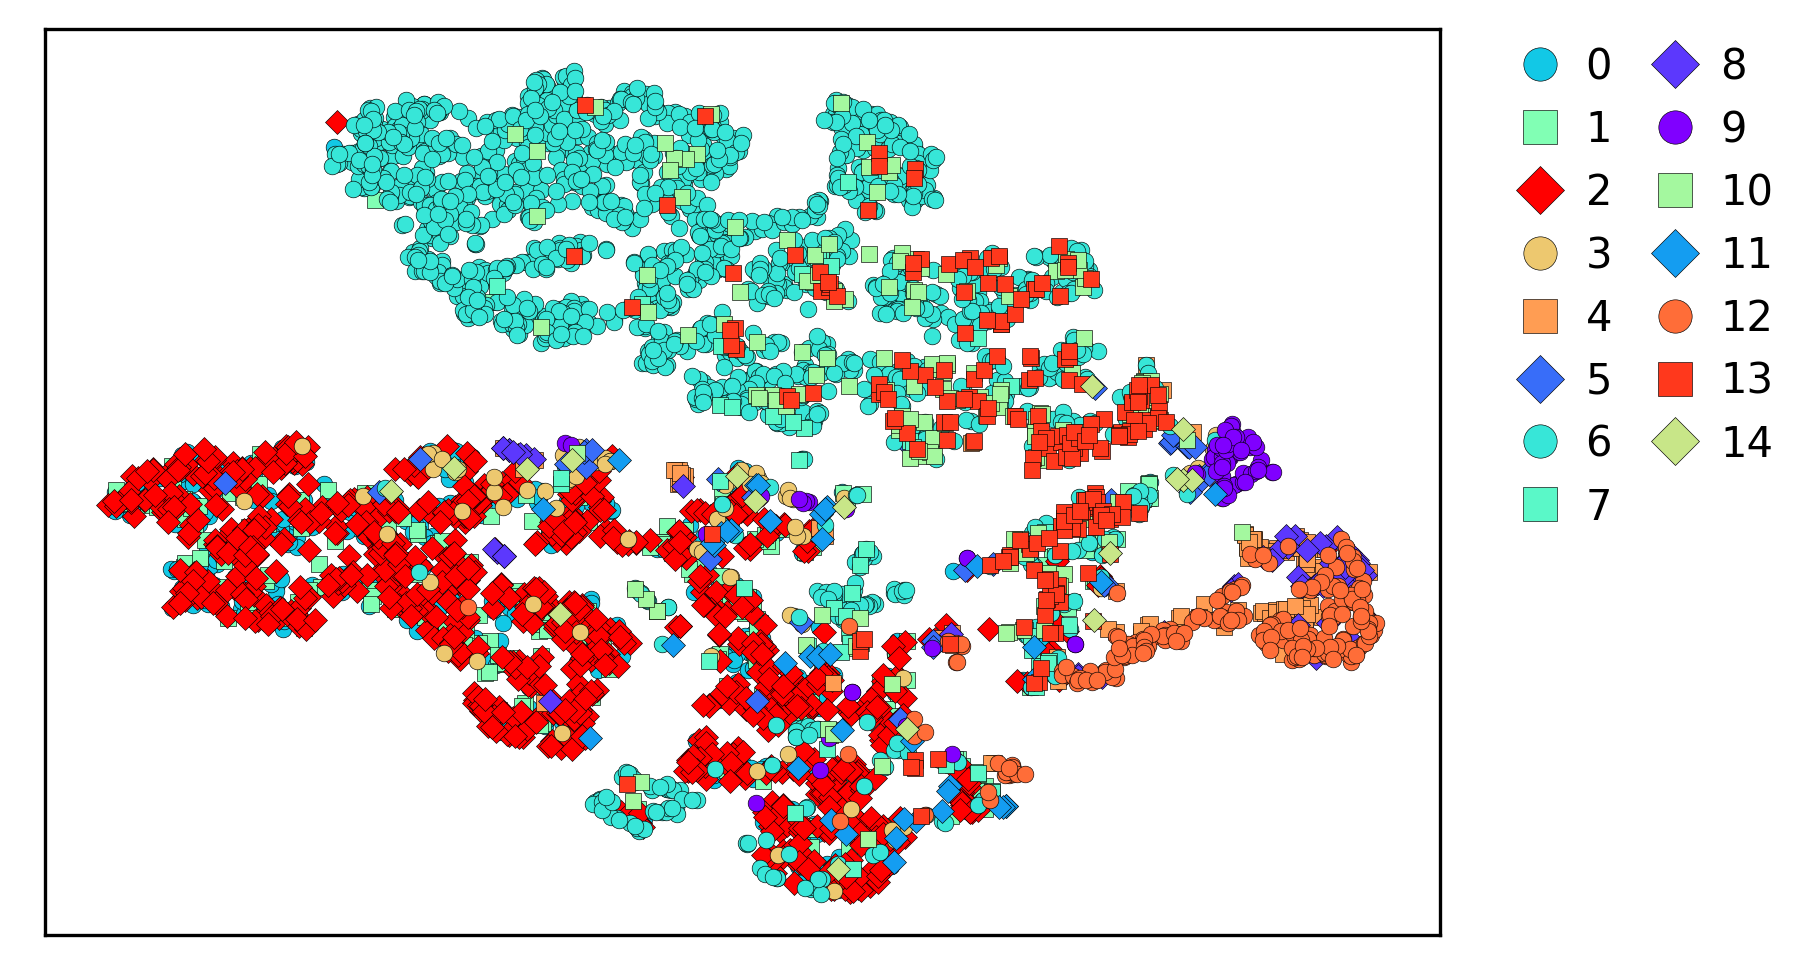

In [19]:
myscatter(ed, cells_number, legend=True)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.6021993160247803 seconds
Jaccard graph constructed in 1.3289761543273926 seconds
Wrote graph to binary file in 0.08151674270629883 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.85698
Louvain completed 21 runs in 2.4777350425720215 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 4.849453687667847 seconds


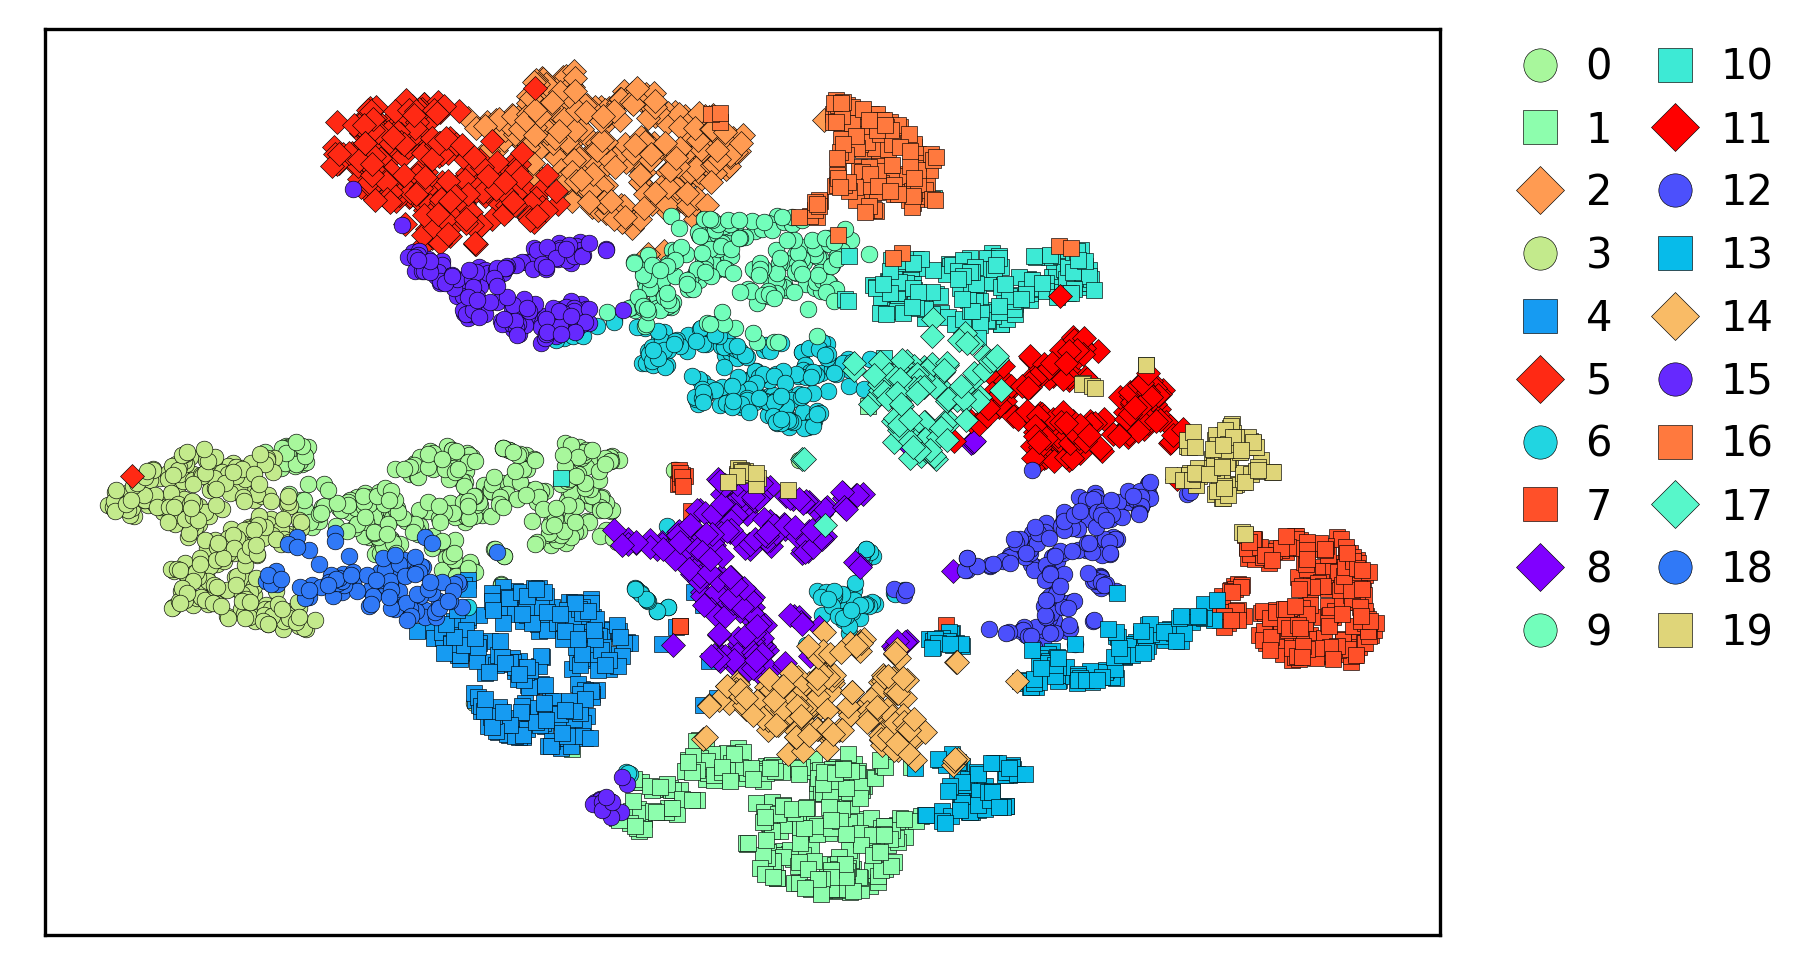

In [20]:
centers, labels = get_centers(np.array(h), mode="louvain", n_cluster=5)
myscatter(ed,labels, legend=True)

In [21]:
autoencoder.clustering_train(centers, wc=5, max_epoch=50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


tf.Tensor(3.1537786, shape=(), dtype=float32)
tf.Tensor(0.51925564, shape=(), dtype=float32)
tf.Tensor(3.1418567, shape=(), dtype=float32)
tf.Tensor(0.5183975, shape=(), dtype=float32)
tf.Tensor(3.027062, shape=(), dtype=float32)
tf.Tensor(0.49679482, shape=(), dtype=float32)
tf.Tensor(2.8635263, shape=(), dtype=float32)
tf.Tensor(0.46536323, shape=(), dtype=float32)
tf.Tensor(2.7227936, shape=(), dtype=float32)
tf.Tensor(0.4384077, shape=(), dtype=float32)
Finish!


In [22]:
h = autoencoder.encoder(x_train)

In [23]:
ed = tsne(h)

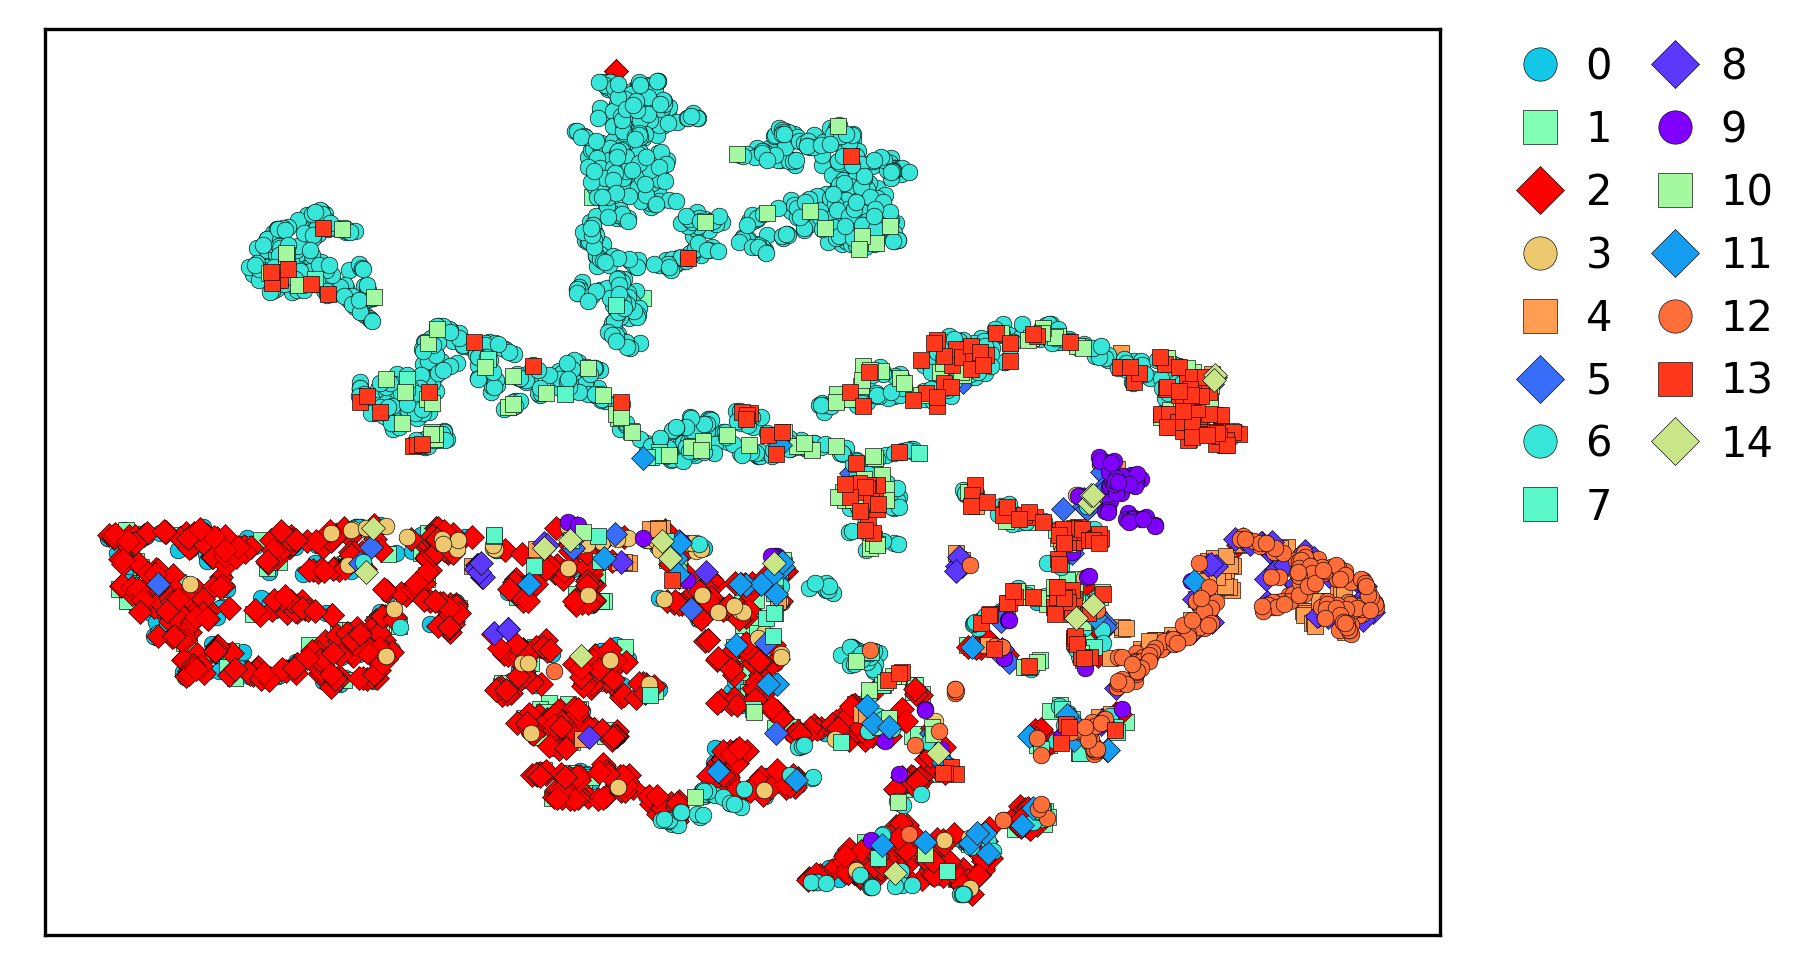

In [25]:
myscatter(ed, cells_number, legend=True)

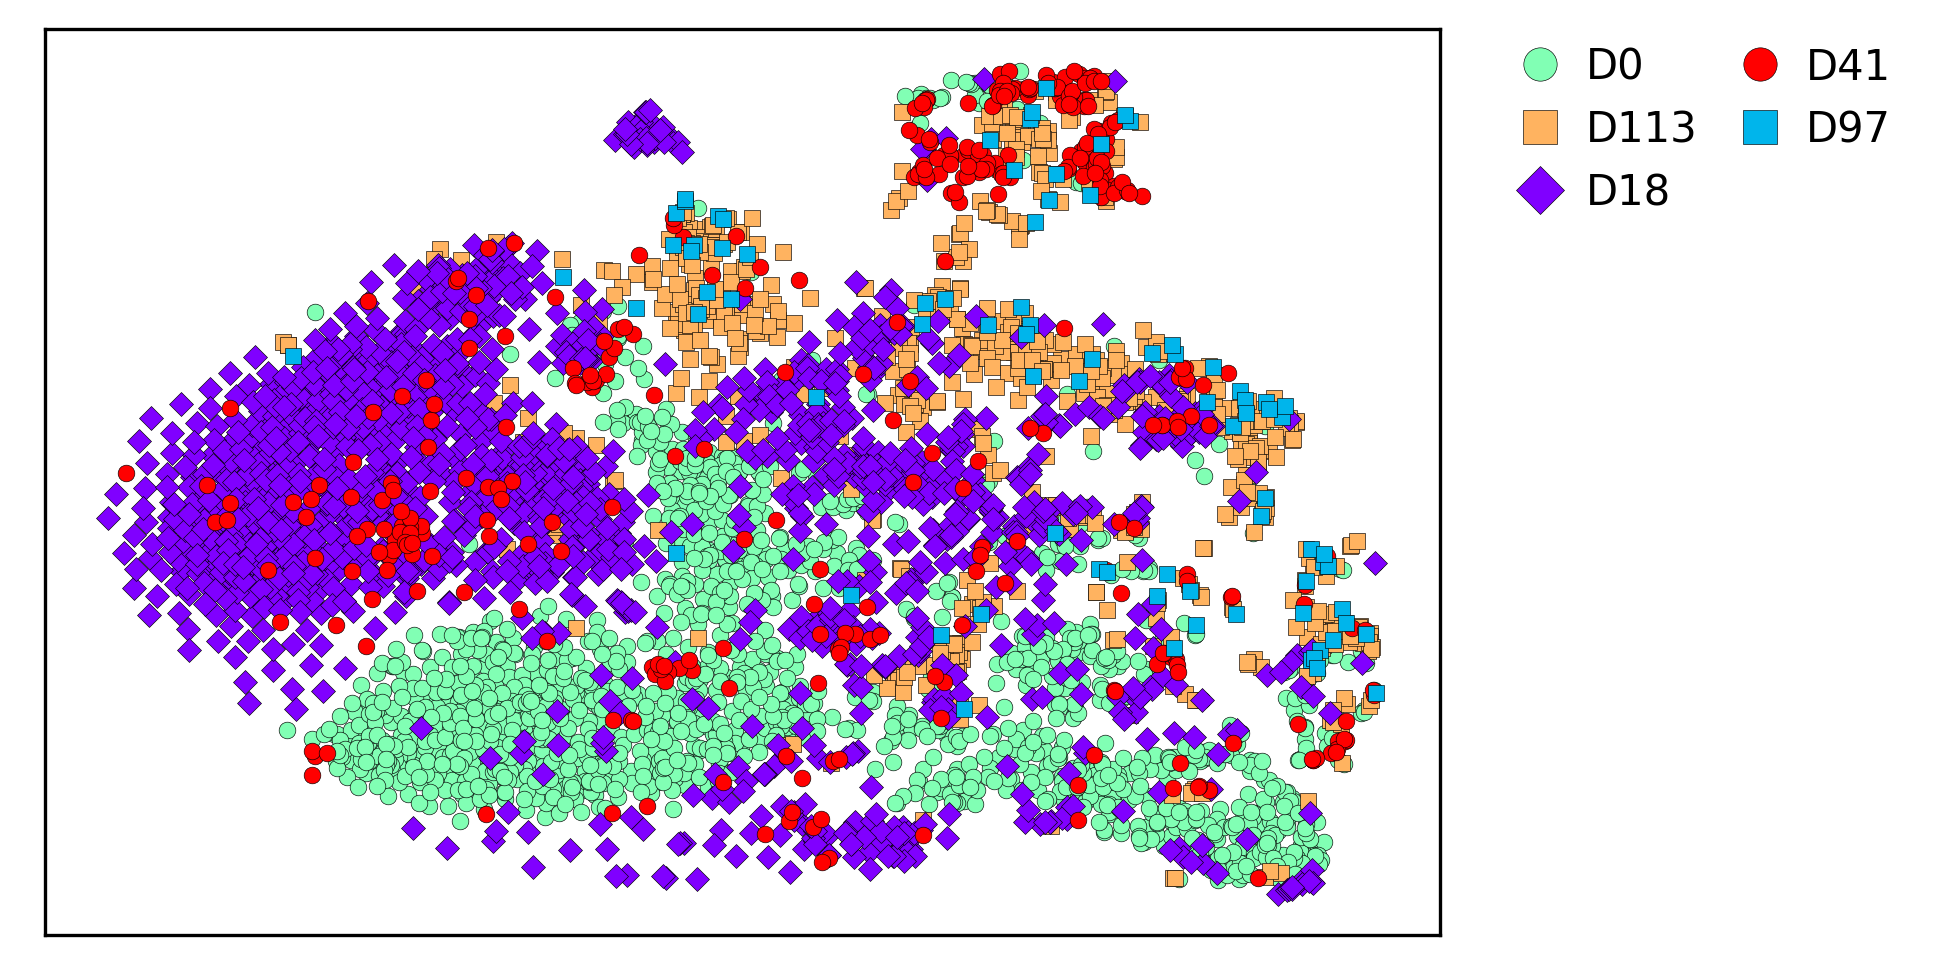

In [50]:
ed = tsne(count)
myscatter(ed, cells, legend=True)

In [26]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, homogeneity_score, completeness_score
def measure(true, pred):
    NMI = round(normalized_mutual_info_score(true, pred), 2)
    RAND = round(adjusted_rand_score(true, pred), 2)
    HOMO = round(homogeneity_score(true, pred), 2)
    COMP = round(completeness_score(true, pred), 2)
    return [NMI, RAND, HOMO, COMP]

In [27]:
labels_new, _,  _ = phenograph.cluster(np.array(h))
measure(cells, labels)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.5959718227386475 seconds
Jaccard graph constructed in 1.341214656829834 seconds
Wrote graph to binary file in 0.10825419425964355 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.907565
Louvain completed 21 runs in 2.465080499649048 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 4.783847093582153 seconds


[0.27, 0.11, 0.44, 0.19]

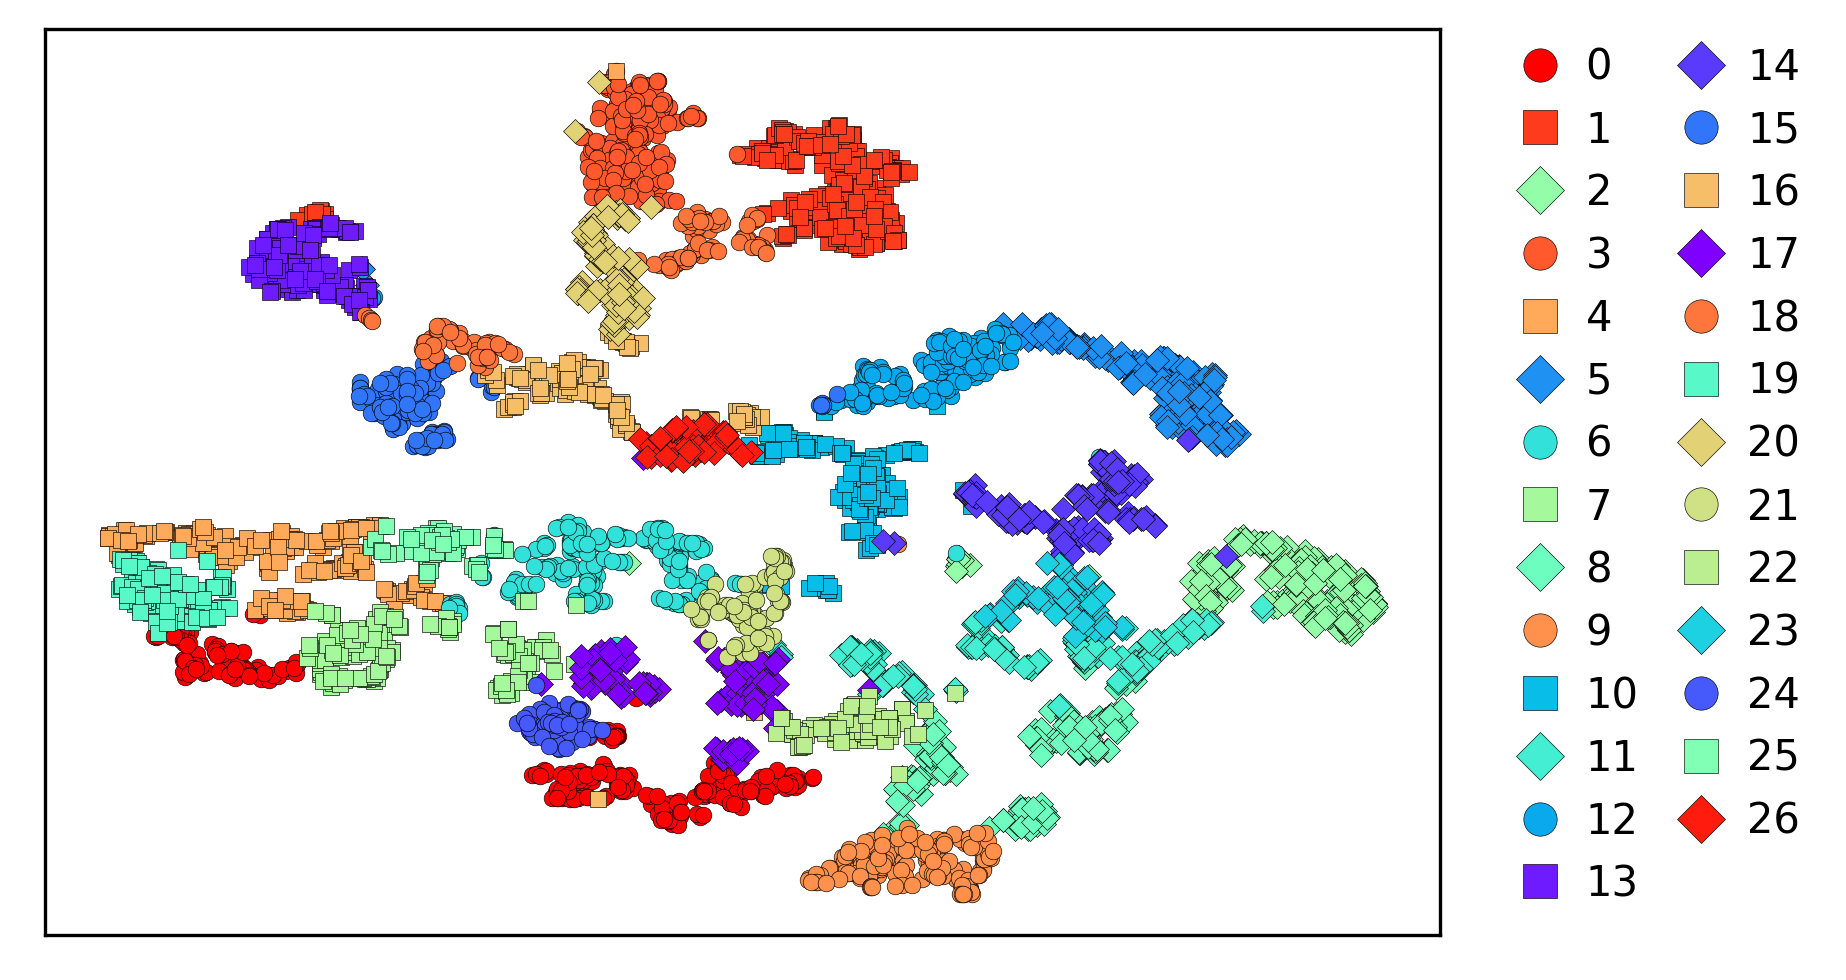

In [28]:
myscatter(ed, labels_new, legend=True)

In [ ]:
labels_new = KMeans(n_clusters=10, random_state=0).fit(np.array(h)).labels_
measure(cells, labels)

In [ ]:
myscatter(ed,labels_new, legend=True)

In [29]:
from scipy.spatial.distance import cdist
dist_mat = cdist(h, h, 'euclidean')

In [30]:
save = pd.DataFrame(dist_mat)
save.to_csv('/content/drive/My Drive/RNN/AML7075-all_dist.csv',index=False,header=True)

In [31]:
y_test = cells_number
y_pred = labels_new

In [32]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 73   0   0   1  69   0  41  43  13  32   0   3   0   0   2   0   0  33
    0  54   0  15  16   3  16  21   0]
 [ 22   0   0   1  13   0  12  27  23  10   2  13   0   0   8   0   0  19
    0  19   1  25   9  15  22   7   0]
 [142   0   1   1 122   0  72 118  54 107   0  15   0   0   0   0   1  80
    0  54   0  35  51   4  40  35   0]
 [  2   0   0   0   6   0  26   3   3   6   0   2   0   0   9   0   0   2
    0   1   0  10   1   2   1   9   0]
 [  0   0  59   0   0   2  10   0   7   0   0  14   0   0   4   0   0   0
    0   0   0   2   2   3   1   1   0]
 [  0   0   0   0   1   2   5   0   1   0   1   3   1   0  13   0   0   0
    0   1   0   3   1   3   0   1   0]
 [ 33 265   0 224   1 105   2   1  17  22 112  40 129 151  29 133 122   0
  133   0 123   0  14  26   0   0  67]
 [  0   0   0   0   0   0   5   0  10   2   2   5   0   1   0   3   1   2
    1   0   1   6   2   1   0   1   5]
 [  1   0  40   0   0   0   6   3   3   0   0   4   0   0   0   0   0   0
    0   0   0   0   0 

In [53]:
cells_number

array([ 0,  1,  2, ...,  6,  6, 12])

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.02861649391617846

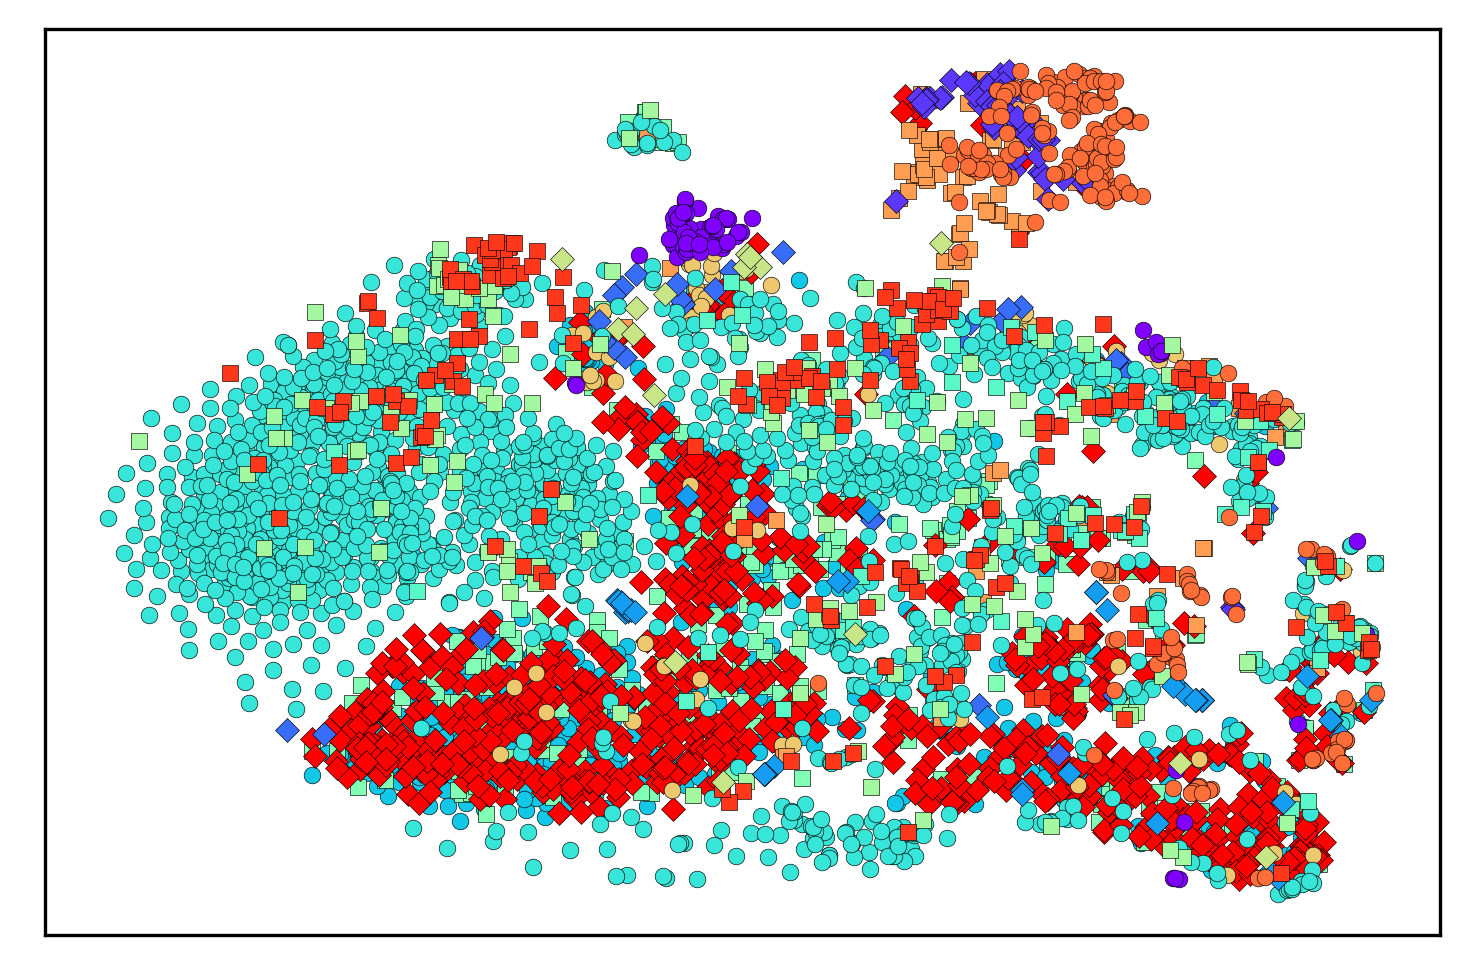

In [54]:
myscatter(ed,cells_number)

In [33]:
save = pd.DataFrame(cf_matrix)
save.to_csv('/content/drive/My Drive/RNN/AML7075-all_matrix.csv',index=False,header=True)

In [35]:
save = pd.DataFrame(labels_new)
save.to_csv('/content/drive/My Drive/RNN/AML7075-all_predict.csv',index=False,header=True)

In [39]:
save = pd.DataFrame(ed)
save.to_csv('/content/drive/My Drive/RNN/AML7075-all_cluster_tsne.csv',index=False,header=True)

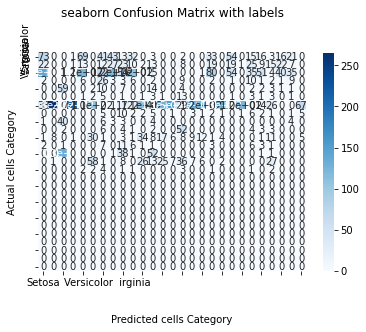

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\n\nPredicted cells Category')
ax.set_ylabel('Actual cells Category');
##Ticker labels-List must be in alphabetical order
ax.xaxis.set_ticklabels(['Setosa','                Versicolor','                                 irginia'])
ax.yaxis.set_ticklabels(['Setosa','              Verscicolor','                     Virginia'])

##Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from random import choice
'从 random modules中导入choice'
class RandomWalk(object):
    '创建一个类 RandomWalk(）.'
    def __init__(self,num_point = 5000):
        '初始化类的属性'
        self.num_point = num_point
        self.x_value=[ 0 ]
        self.y_value=[ 0 ]
        '指定开始位置'

    def fill_walk(self):
        '定义随机漫步的方法，'
        while len(self.x_value) < self.num_point:
            x_direction = choice([1,-1])
            '随机漫步的方向 1:向右   -1: 向左'
            x_distance = choice([0,1,2,3,4,5])
            '随机漫步的距离'
            x_step = x_direction * x_distance
            '随机漫步的 位移（大小和方向）'
            y_direction = choice([-1,1])
            y_distance = choice([0,1,2,3,4,5])
            y_step = y_direction * y_distance

            if x_step ==0 and y_step ==0:
                continue
            '避免原地踏步'

            next_x =self.x_value[-1] + x_step
            '确定 点的 新位置'
            next_y =self.y_value[-1] + y_step

            self.x_value.append(next_x)
            '将已经走过的点 添加到列表中'
            self.y_value.append(next_y)

In [ ]:
import matplotlib.pyplot as plt
'导入matplotlib.pilot 命名为 plt'
from random_walk import RandomWalk
"从random_walk 中导入 RandomWalk 类"
while True:
    rw =RandomWalk()
    rw.fill_walk()
    '调用 fill_walk() 方法'

    point = list(range(rw.num_point))
    '生成和步数一样多的列表'
    plt.scatter(rw.x_value,rw.y_value,c=point,cmap = plt.cm.Reds,
                edgecolor = None,s=10)

    plt.scatter(0,0,c= "green",edgecolor= "None",s=20)
    plt.scatter(rw.x_value[-1],rw.y_value[-1],c="green",edgecolor = "None",s=50)
    '突出首个点 和 最后一个点 '

    plt.axes().get_xaxis().set_visible(False)
    plt.axes().get_yaxis().set_visible(False)
    '隐藏横纵坐标'

    plt.show()
    keep_running = input("make another walk? y or n :")
    if keep_running == 'n':
        break
    '判断时候继续 随机漫步'
随机漫步生成的图：